<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Response_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

import datetime as dt
import datetime
import csv
import math

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.mlab as mlab

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

from sklearn import linear_model
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, f_regression
import lightgbm as lgb
from sklearn.feature_extraction.text import HashingVectorizer


from scipy.integrate import simps
from scipy.stats import spearmanr, pearsonr
from scipy.stats import norm

from pandas_datareader import data

from IPython.display import display

In [ ]:
# reading the dataset
df = pd.read_csv("/content/ACT Instant Database.csv")
data = pd.read_csv("/content/ACT Instant Database.csv")

In [ ]:
# top 5 rows of the dataset
df.head(5)

,AdNumber,ID,Brand,AdName,Platform,Region,Market,B2CB2B,Category,ProductService,BreakthroughScore,ResponseScore,Audio,MusicUsed,HowisMusicUsed_na,HowisMusicUsed_prominent,HowisMusicUsed_background,MusicGenreUsed,MusicType_custom,MusicType_na,MusicType_popular,MusicDuration,JingleAudioMnemonic,Doesvideofeaturespeech,SpeechDuration,...,X_MessagePresent,Slogan,HowMessageDelivered_visual,HowMessageDelivered_both,HowMessageDelivered_audio,Emotion_functional,Emotion_both,Emotion_emotional,Emotion_na,Videomakesensewithoutsound,Animation,VignetteFormat,Humor,SliceofLife,Ingredients,ProminentColor,NumberofScenes,Avg_secondsperscene,VideoEnd_Package,VideoEnd_ScenefromAd,VideoEnd_Logo,SpecialOccation,Holidays,TotalAdDuration,NumberFrames
0,1,2950,Mercedes,AI_Mercedes_2950,Non-mobile,Western Europe,Germany,B2C,Automotive,Product,9.38e+01,2.19e+01,1,1,0,0,1,NaN,1,0,0,9.90e-01,0,1,4.20e-01,...,1.00e+01,0,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,NaN,18,1.66e+00,0,0,0,1,0,2.99e+01,299
1,2,2954,Nintendo wii,AI_Nintendo WII_2954,Non-mobile,Western Europe,Germany,B2C,Entertainment,Product,9.69e+01,4.53e+01,1,1,0,0,1,NaN,1,0,0,9.30e-01,0,1,8.30e-01,...,1.37e+01,0,0,1,0,0,0,1,0,0,0.00e+00,0,1,0,0,NaN,17,1.29e+00,0,0,0,0,0,2.19e+01,221
2,3,2955,O2,AI_O2_2955,Non-mobile,Western Europe,Germany,B2C,Telecommunications,Service,7.19e+01,9.38e+00,1,1,0,0,1,"Alternative, Indie Rock, Electro, Techno/House...",0,0,1,9.90e-01,1,1,5.20e-01,...,2.02e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,NaN,25,1.19e+00,0,0,0,0,0,2.98e+01,299
3,4,2979,Postbank,AI_Postbank_2979,Non-mobile,Western Europe,Germany,B2C,Financial_Services,Product,1.00e+02,1.25e+01,1,1,0,0,1,NaN,1,0,0,1.00e+00,0,1,6.40e-01,...,3.52e+01,1,0,1,0,0,0,1,0,0,0.00e+00,0,0,1,0,NaN,11,1.81e+00,0,0,0,0,0,1.99e+01,200
4,5,2982,Renault,AI_Mc Donalds_2982,Non-mobile,Western Europe,Germany,B2C,Automotive,Product,7.19e+01,3.75e+01,1,1,0,0,1,NaN,1,0,0,8.80e-01,1,1,5.90e-01,...,9.16e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,1,1,NaN,9,2.79e+00,0,0,0,0,0,2.51e+01,252


In [ ]:
# checking the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Columns: 161 entries, AdNumber to NumberFrames
dtypes: float64(29), int64(117), object(15)
memory usage: 956.1+ KB


In [ ]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
int64      117
float64     29
object      15
dtype: int64


In [ ]:
# number of oberservations in the dataset
len(df)

760

In [ ]:
# shape of the dataset
df.shape

(760, 161)

In [ ]:
# any missing values in the columns of the dataset
df.isnull().any()

AdNumber           False
ID                 False
Brand              False
AdName             False
Platform           False
                   ...  
VideoEnd_Logo      False
SpecialOccation    False
Holidays           False
TotalAdDuration    False
NumberFrames       False
Length: 161, dtype: bool

In [ ]:
# any missing values in the columns of the dataset
# missing column function
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 161 columns and 760 Rows.
There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
CalltoActionButton,1,757,9.96e+01,758,9.97e+01,float64
ProminentColor,0,756,9.95e+01,756,9.95e+01,object
MusicGenreUsed,0,743,9.78e+01,743,9.78e+01,object
DirectResponseType,0,668,8.79e+01,668,8.79e+01,object
Animaltype,0,663,8.72e+01,663,8.72e+01,object
Region,0,36,4.70e+00,36,4.70e+00,object
CompetitiveBrands,717,4,5.00e-01,721,9.49e+01,float64
ProductinUse_ProductDemo,296,3,4.00e-01,299,3.93e+01,float64
LogoPlacementsMiddleCenterDurati,205,1,1.00e-01,206,2.71e+01,float64
MessageIntroduced,44,1,1.00e-01,45,5.90e+00,float64


In [ ]:
# looking for unique values in the categorical variable
cols = ['CalltoActionButton', 'ProminentColor', 'MusicGenreUsed', 'DirectResponseType','Animaltype','Region','CompetitiveBrands','ProductinUse_ProductDemo','LogoPlacementsMiddleCenterDurati','MessageIntroduced','Animation' ]
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

CalltoActionButton :
1.00e+00    2
0.00e+00    1
Name: CalltoActionButton, dtype: int64 

ProminentColor :
Red, Blue jean    1
Red               1
Brown             1
Blue              1
Name: ProminentColor, dtype: int64 

MusicGenreUsed :
Films/Games Film Scores                                             3
Hip Hop                                                             2
Christian                                                           1
Pop                                                                 1
World                                                               1
Electro Dance                                                       1
Pop Rock                                                            1
Dance Pop                                                           1
Dance - Drum & Bass                                                 1
Films/Games                                                         1
Indie                                                      

Now impute the missing values with something sensible.

In [ ]:
df['Animaltype'] = df['Animaltype'].fillna('Unknown')
df['Region'] = df['Region'].fillna('Unknown')


df['CompetitiveBrands'] = df['CompetitiveBrands'].fillna(0)
df['ProductinUse_ProductDemo'] = df['ProductinUse_ProductDemo'].fillna('1')
df['LogoPlacementsMiddleCenterDurati'] = df['LogoPlacementsMiddleCenterDurati'].fillna(df['LogoPlacementsMiddleCenterDurati'].mean())
df['MessageIntroduced'] = df['MessageIntroduced'].fillna(df['MessageIntroduced'].mean())
df['Animation'] = df['Animation'].fillna(0)

Here we drop the variables wherein missing value is more than 90%.

In [ ]:
df = df.drop(['CalltoActionButton','ProminentColor','MusicGenreUsed','DirectResponseType'],axis = 1)

In [ ]:
# looking for unique values in the categorical variable
cols = ['Platform', 'Region', 'Market', 'B2CB2B','Category','Animaltype' ]
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

Platform :
Mobile                401
Non-mobile            333
Mobile - simulated     26
Name: Platform, dtype: int64 

Region :
Asia                 335
Western Europe       149
Latin America        103
Middle East           59
North America         49
Unknown               36
Oceania/Australia     28
ASIA                   1
Name: Region, dtype: int64 

Market :
India                       103
Brazil                       71
France                       55
China                        51
United States of America     49
United Kingdom               43
Australia                    34
Philippines                  33
South Korea                  32
Mexico                       32
Thailand                     31
Spain                        31
Argentina                    30
United Arab Emirates         30
Saudi Arabia                 29
Vietnam                      25
Japan                        22
Malaysia                     21
Germany                      20
Indonesia                

Checking again if there are any missing values

In [ ]:
# any missing values in the columns of the dataset
# missing column function
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 157 columns and 760 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


lets see if we have any null values and missing data. I want to plot a heatmap for null values. Guess I need Seaborn let's import that and plot the data

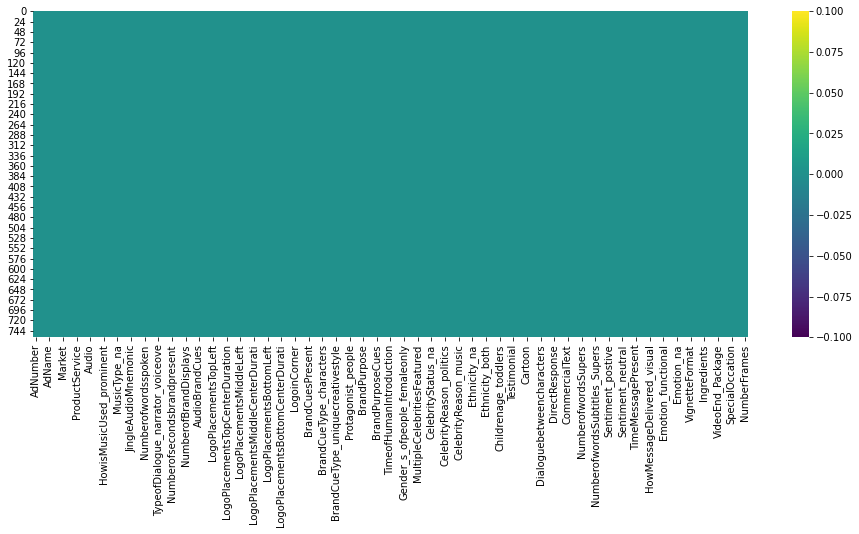

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(df.isnull(),cmap = 'viridis')

In [ ]:
# object datatype variables
df.loc[:, df.dtypes == object]

,ID,Brand,AdName,Platform,Region,Market,B2CB2B,Category,ProductService,ProductinUse_ProductDemo,Animaltype,CommercialText,NumberFrames
0,2950,Mercedes,AI_Mercedes_2950,Non-mobile,Western Europe,Germany,B2C,Automotive,Product,1.00e+00,dog,mercedes-benz stellaben sign der neue vie sie ...,299
1,2954,Nintendo wii,AI_Nintendo WII_2954,Non-mobile,Western Europe,Germany,B2C,Entertainment,Product,1.00e+00,Unknown,"49:32 wii. wii 48.18 46?? 50.1 46.39 50,4 reso...",221
2,2955,O2,AI_O2_2955,Non-mobile,Western Europe,Germany,B2C,Telecommunications,Service,1.00e+00,dog,"in über 60 länder. sarargs.com naargecom o, o2...",299
3,2979,Postbank,AI_Postbank_2979,Non-mobile,Western Europe,Germany,B2C,Financial_Services,Product,0.00e+00,Unknown,www.botan.de www.postane www.posthark.com post...,200
4,2982,Renault,AI_Mc Donalds_2982,Non-mobile,Western Europe,Germany,B2C,Automotive,Product,1.00e+00,Unknown,ml 22 ich liebe es,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,UAE5,Ariel,AI_Ariel_5.mp4,Mobile,Middle East,United Arab Emirates,B2C,Household_Cleaning,Laundry,1.00e+00,Unknown,ariel 14 cariel do you pod? 3in1 pods ariel yo...,200
756,UAE6,adidas,AI_Adidas_6.mp4,Mobile,Middle East,United Arab Emirates,B2C,Fashion,Fashion,0.00e+00,Unknown,ale con adidas ozwalfego adidas as adidas ozwe...,100
757,UAE7,Bayut,AI_Bayut_7.mp4,Mobile,Middle East,United Arab Emirates,B2C,Technology_Electronics,Online portal,0.00e+00,Unknown,?? 22 always do your research. we do. @bayut.c...,300
758,UAE8,Carrefour,AI_Carrefour_8.mp4,Mobile,Middle East,United Arab Emirates,B2C,Retail,Retail,0.00e+00,dog,t) order at que una milionit ruhiwala ?????? i...,151


In [ ]:
# float datatype variables
df.loc[:, df.dtypes == float]

,BreakthroughScore,ResponseScore,MusicDuration,SpeechDuration,BrandRevealedAt,Numberofsecondsbrandpresent,PofAdBrandPresent,TotalNoofsecsBRANDisClearlyVisib,PofAdBrandClearlyVisible,LogoPlacementsTopLeftDuration,LogoPlacementsTopCenterDuration,LogoPlacementsTopRightDuration,LogoPlacementsMiddleLeftDuration,LogoPlacementsMiddleCenterDurati,LogoPlacementsMiddleRightDuratio,LogoPlacementsBottomLeftDuration,LogoPlacementsBottomCenterDurati,LogoPlacementsBottomRightDuratio,CompetitiveBrands,TimeofHumanIntroduction,SizeofWordsSupers_Subtitles,MessageIntroduced,TimeMessagePresent,X_MessagePresent,Animation,Avg_secondsperscene,TotalAdDuration
0,9.38e+01,2.19e+01,9.90e-01,4.20e-01,2.47e+01,4.00e+00,1.34e+01,5.00e+00,1.67e+01,0.00e+00,2.60e+00,0.00e+00,0.00e+00,1.60e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.12e+01,4.67e+00,2.50e+01,3.00e+00,1.00e+01,0.00e+00,1.66e+00,2.99e+01
1,9.69e+01,4.53e+01,9.30e-01,8.30e-01,1.00e+00,5.00e+00,2.26e+01,6.00e+00,2.74e+01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.76e+00,1.06e+01,1.80e+01,3.00e+00,1.37e+01,0.00e+00,1.29e+00,2.19e+01
2,7.19e+01,9.38e+00,9.90e-01,5.20e-01,2.57e+01,4.10e+00,1.37e+01,8.00e+00,2.69e+01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.20e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,6.65e+00,1.20e+01,6.00e+00,2.02e+01,0.00e+00,1.19e+00,2.98e+01
3,1.00e+02,1.25e+01,1.00e+00,6.40e-01,3.00e+00,8.40e+00,4.20e+01,1.00e+00,5.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,3.30e+00,0.00e+00,0.00e+00,5.30e+00,1.00e+00,1.60e+00,5.58e+00,1.20e+01,7.00e+00,3.52e+01,0.00e+00,1.81e+00,1.99e+01
4,7.19e+01,3.75e+01,8.80e-01,5.90e-01,0.00e+00,0.00e+00,0.00e+00,2.00e+00,8.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e-01,1.24e+01,1.00e+00,2.30e+01,9.16e+01,0.00e+00,2.79e+00,2.51e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,1.00e+02,9.69e+01,9.70e-01,7.20e-01,1.00e-01,1.99e+01,9.95e+01,2.00e+01,1.00e+02,4.00e+01,1.29e+01,0.00e+00,0.00e+00,4.10e+00,2.20e+00,0.00e+00,4.10e+00,2.50e+00,0.00e+00,1.00e+00,1.13e+01,3.00e+00,1.70e+01,8.54e+01,0.00e+00,1.81e+00,1.99e+01
756,1.00e+02,7.03e+01,9.90e-01,0.00e+00,1.60e+00,3.30e+00,3.30e+01,4.00e+00,4.04e+01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,8.30e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.05e+01,2.00e+00,8.00e+00,8.08e+01,0.00e+00,7.60e-01,9.90e+00
757,8.12e+01,3.59e+01,9.30e-01,2.20e-01,2.40e+01,6.00e+00,2.00e+01,6.00e+00,2.01e+01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,9.80e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e-01,7.10e+00,1.00e+01,1.00e+01,3.34e+01,0.00e+00,5.98e+00,2.99e+01
758,1.00e+02,8.12e+01,9.90e-01,9.20e-01,1.41e+01,1.00e+00,6.60e+00,3.00e+00,2.00e+01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,3.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e-01,7.70e+00,1.30e+01,2.00e+00,1.33e+01,0.00e+00,1.36e+00,1.50e+01


In [ ]:
df[['TotalAdDuration', 'X_MessagePresent','MusicDuration','SpeechDuration']].describe()

,TotalAdDuration,X_MessagePresent,MusicDuration,SpeechDuration
count,7.60e+02,7.60e+02,7.60e+02,7.60e+02
mean,3.47e+01,6.24e+01,8.64e-01,3.70e-01
std,4.92e+01,3.07e+01,2.52e-01,3.41e-01
min,4.00e+00,0.00e+00,0.00e+00,0.00e+00
25%,1.51e+01,3.36e+01,9.00e-01,0.00e+00
50%,2.99e+01,6.78e+01,9.70e-01,2.70e-01
75%,3.32e+01,9.07e+01,9.90e-01,7.00e-01
max,1.02e+03,1.02e+02,1.00e+00,1.00e+00


In [ ]:
#  take a 4-Quantile or a quartile based adaptive binning scheme
#quantile_list = [0, .25, .5, .75, 1.]
#quantiles = df['TotalAdDuration'].quantile(quantile_list)

#quantiles

In [ ]:
#  visualize these quantiles in the original distribution histogram
#fig, ax = plt.subplots()

#df['TotalAdDuration'].hist(bins=30, color='#A9C5D3', edgecolor='black', grid=False)
#for quantile in quantiles:
#    qvl = plt.axvline(quantile, color='r')
    
#ax.legend([qvl], ['Quantiles'], fontsize=10)
#ax.set_title('TotalAdDuration', fontsize=12)
#ax.set_xlabel('TotalAdDuration', fontsize=12)
#ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
# Binning numerical columns
#df['Cat_TotalAdDuration'] = pd.qcut(df.TotalAdDuration, q=4, labels=False )

#df.head()

In [ ]:
# viewing TotalAdDuration columns
#cols = ['TotalAdDuration','Cat_TotalAdDuration']

#df[cols].head()

In [ ]:
# Binning numerical columns
#df['Cat_X_MessagePresent'] = pd.qcut(df.X_MessagePresent, q=4, labels=False )
#df['Cat_MusicDuration'] = pd.qcut(df.MusicDuration, q=4, labels=False )

Feature Engineering on Catagerical Variables, doing label encoding not the one hot encoding as the observations are very few which could result to overfitting.

In [ ]:
cols = ('Platform', 'Region', 'Market', 'B2CB2B','Category','ProductService','Animaltype') 

for i in cols:
    
   LE = LabelEncoder() 
   LE.fit(list(df[i].values)) 
   df[i] = LE.transform(list(df[i].values))

In [ ]:
# object datatype variables
df.loc[:, df.dtypes == object]

,ID,Brand,AdName,ProductinUse_ProductDemo,CommercialText,NumberFrames
0,2950,Mercedes,AI_Mercedes_2950,1.00e+00,mercedes-benz stellaben sign der neue vie sie ...,299
1,2954,Nintendo wii,AI_Nintendo WII_2954,1.00e+00,"49:32 wii. wii 48.18 46?? 50.1 46.39 50,4 reso...",221
2,2955,O2,AI_O2_2955,1.00e+00,"in über 60 länder. sarargs.com naargecom o, o2...",299
3,2979,Postbank,AI_Postbank_2979,0.00e+00,www.botan.de www.postane www.posthark.com post...,200
4,2982,Renault,AI_Mc Donalds_2982,1.00e+00,ml 22 ich liebe es,252
...,...,...,...,...,...,...
755,UAE5,Ariel,AI_Ariel_5.mp4,1.00e+00,ariel 14 cariel do you pod? 3in1 pods ariel yo...,200
756,UAE6,adidas,AI_Adidas_6.mp4,0.00e+00,ale con adidas ozwalfego adidas as adidas ozwe...,100
757,UAE7,Bayut,AI_Bayut_7.mp4,0.00e+00,?? 22 always do your research. we do. @bayut.c...,300
758,UAE8,Carrefour,AI_Carrefour_8.mp4,0.00e+00,t) order at que una milionit ruhiwala ?????? i...,151


In [ ]:
# dropping the original column
#df = df.drop(['Platform', 'Region', 'Market', 'B2CB2B','Category','ProductService','Animaltype'], axis=1)

In [ ]:
df.describe()

,AdNumber,Platform,Region,Market,B2CB2B,Category,ProductService,BreakthroughScore,ResponseScore,Audio,MusicUsed,HowisMusicUsed_na,HowisMusicUsed_prominent,HowisMusicUsed_background,MusicType_custom,MusicType_na,MusicType_popular,MusicDuration,JingleAudioMnemonic,Doesvideofeaturespeech,SpeechDuration,Numberofwordsspoken,TypeofDialogue_charactertalkingt,TypeofDialogue_intercharacterdia,TypeofDialogue_narrator_voiceove,...,NumberofMessages,TimeMessagePresent,X_MessagePresent,Slogan,HowMessageDelivered_visual,HowMessageDelivered_both,HowMessageDelivered_audio,Emotion_functional,Emotion_both,Emotion_emotional,Emotion_na,Videomakesensewithoutsound,Animation,VignetteFormat,Humor,SliceofLife,Ingredients,NumberofScenes,Avg_secondsperscene,VideoEnd_Package,VideoEnd_ScenefromAd,VideoEnd_Logo,SpecialOccation,Holidays,TotalAdDuration
count,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,...,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02
mean,3.80e+02,9.11e-01,3.04e+00,8.78e+00,1.81e+00,1.13e+01,1.84e+01,5.46e+01,6.05e+01,9.75e-01,9.58e-01,5.00e-02,2.18e-01,7.32e-01,7.93e-01,4.47e-02,1.62e-01,8.64e-01,1.54e-01,7.53e-01,3.70e-01,2.42e+01,2.63e-01,2.26e-01,6.70e-01,...,2.58e+00,1.83e+01,6.24e+01,5.43e-01,1.84e-01,7.66e-01,5.00e-02,4.59e-01,2.67e-01,2.34e-01,3.95e-02,5.82e-01,1.42e-01,2.14e-01,1.99e-01,4.62e-01,2.18e-01,1.87e+01,2.80e+00,1.82e-01,2.42e-01,5.25e-01,9.47e-02,5.13e-02,3.47e+01
std,2.20e+02,9.79e-01,2.39e+00,5.87e+00,5.87e-01,6.68e+00,2.31e+00,3.24e+01,2.85e+01,1.56e-01,2.01e-01,2.18e-01,4.13e-01,4.43e-01,4.05e-01,2.07e-01,3.69e-01,2.52e-01,3.61e-01,4.32e-01,3.41e-01,3.75e+01,4.41e-01,4.19e-01,4.71e-01,...,2.97e+00,1.72e+01,3.07e+01,4.98e-01,3.88e-01,4.24e-01,2.18e-01,4.99e-01,4.43e-01,4.24e-01,1.95e-01,4.94e-01,3.49e-01,4.11e-01,3.99e-01,4.99e-01,4.13e-01,1.70e+01,6.08e+00,3.86e-01,4.29e-01,5.00e-01,2.93e-01,2.21e-01,4.92e+01
min,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,6.70e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.00e+00
25%,1.91e+02,0.00e+00,1.00e+00,4.00e+00,2.00e+00,8.00e+00,1.80e+01,2.50e+01,3.44e+01,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,9.00e-01,0.00e+00,1.00e+00,0.00e+00,2.00e+00,0.00e+00,0.00e+00,0.00e+00,...,1.00e+00,8.00e+00,3.36e+01,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,9.00e+00,1.25e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.51e+01
50%,3.80e+02,0.00e+00,2.00e+00,7.00e+00,2.00e+00,9.00e+00,1.80e+01,5.62e+01,6.88e+01,1.00e+00,1.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,9.70e-01,0.00e+00,1.00e+00,2.70e-01,1.10e+01,0.00e+00,0.00e+00,1.00e+00,...,2.00e+00,1.50e+01,6.78e+01,1.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.50e+01,1.66e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,2.99e+01
75%,5.70e+02,2.00e+00,5.00e+00,1.40e+01,2.00e+00,1.50e+01,1.80e+01,8.44e+01,8.44e+01,1.00e+00,1.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,9.90e-01,0.00e+00,1.00e+00,7.00e-01,3.40e+01,1.00e+00,0.00e+00,1.00e+00,...,3.00e+00,2.50e+01,9.07e+01,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,2.40e+01,2.48e+00,0.00e+00,0.0

Adnumber column for sure is not needed for data prediction so I am dropping AdNumber column

In [ ]:
df.drop(['AdNumber'], axis = 1,inplace = True)
df.shape

(760, 156)

In [ ]:
# name of the columns
df.columns

Index(['ID', 'Brand', 'AdName', 'Platform', 'Region', 'Market', 'B2CB2B',
       'Category', 'ProductService', 'BreakthroughScore',
       ...
       'Ingredients', 'NumberofScenes', 'Avg_secondsperscene',
       'VideoEnd_Package', 'VideoEnd_ScenefromAd', 'VideoEnd_Logo',
       'SpecialOccation', 'Holidays', 'TotalAdDuration', 'NumberFrames'],
      dtype='object', length=156)

In [ ]:
df.describe()

,Platform,Region,Market,B2CB2B,Category,ProductService,BreakthroughScore,ResponseScore,Audio,MusicUsed,HowisMusicUsed_na,HowisMusicUsed_prominent,HowisMusicUsed_background,MusicType_custom,MusicType_na,MusicType_popular,MusicDuration,JingleAudioMnemonic,Doesvideofeaturespeech,SpeechDuration,Numberofwordsspoken,TypeofDialogue_charactertalkingt,TypeofDialogue_intercharacterdia,TypeofDialogue_narrator_voiceove,BrandRevealedAt,...,NumberofMessages,TimeMessagePresent,X_MessagePresent,Slogan,HowMessageDelivered_visual,HowMessageDelivered_both,HowMessageDelivered_audio,Emotion_functional,Emotion_both,Emotion_emotional,Emotion_na,Videomakesensewithoutsound,Animation,VignetteFormat,Humor,SliceofLife,Ingredients,NumberofScenes,Avg_secondsperscene,VideoEnd_Package,VideoEnd_ScenefromAd,VideoEnd_Logo,SpecialOccation,Holidays,TotalAdDuration
count,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,...,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02,7.60e+02
mean,9.11e-01,3.04e+00,8.78e+00,1.81e+00,1.13e+01,1.84e+01,5.46e+01,6.05e+01,9.75e-01,9.58e-01,5.00e-02,2.18e-01,7.32e-01,7.93e-01,4.47e-02,1.62e-01,8.64e-01,1.54e-01,7.53e-01,3.70e-01,2.42e+01,2.63e-01,2.26e-01,6.70e-01,9.04e+00,...,2.58e+00,1.83e+01,6.24e+01,5.43e-01,1.84e-01,7.66e-01,5.00e-02,4.59e-01,2.67e-01,2.34e-01,3.95e-02,5.82e-01,1.42e-01,2.14e-01,1.99e-01,4.62e-01,2.18e-01,1.87e+01,2.80e+00,1.82e-01,2.42e-01,5.25e-01,9.47e-02,5.13e-02,3.47e+01
std,9.79e-01,2.39e+00,5.87e+00,5.87e-01,6.68e+00,2.31e+00,3.24e+01,2.85e+01,1.56e-01,2.01e-01,2.18e-01,4.13e-01,4.43e-01,4.05e-01,2.07e-01,3.69e-01,2.52e-01,3.61e-01,4.32e-01,3.41e-01,3.75e+01,4.41e-01,4.19e-01,4.71e-01,1.73e+01,...,2.97e+00,1.72e+01,3.07e+01,4.98e-01,3.88e-01,4.24e-01,2.18e-01,4.99e-01,4.43e-01,4.24e-01,1.95e-01,4.94e-01,3.49e-01,4.11e-01,3.99e-01,4.99e-01,4.13e-01,1.70e+01,6.08e+00,3.86e-01,4.29e-01,5.00e-01,2.93e-01,2.21e-01,4.92e+01
min,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,6.70e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.00e+00
25%,0.00e+00,1.00e+00,4.00e+00,2.00e+00,8.00e+00,1.80e+01,2.50e+01,3.44e+01,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,9.00e-01,0.00e+00,1.00e+00,0.00e+00,2.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e-01,...,1.00e+00,8.00e+00,3.36e+01,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,9.00e+00,1.25e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.51e+01
50%,0.00e+00,2.00e+00,7.00e+00,2.00e+00,9.00e+00,1.80e+01,5.62e+01,6.88e+01,1.00e+00,1.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,9.70e-01,0.00e+00,1.00e+00,2.70e-01,1.10e+01,0.00e+00,0.00e+00,1.00e+00,1.00e+00,...,2.00e+00,1.50e+01,6.78e+01,1.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.50e+01,1.66e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,2.99e+01
75%,2.00e+00,5.00e+00,1.40e+01,2.00e+00,1.50e+01,1.80e+01,8.44e+01,8.44e+01,1.00e+00,1.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,9.90e-01,0.00e+00,1.00e+00,7.00e-01,3.40e+01,1.00e+00,0.00e+00,1.00e+00,1.14e+01,...,3.00e+00,2.50e+01,9.07e+01,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,2.40e+01,2.48e+00,0.00e

In [ ]:
# object datatype variables
df.loc[:, df.dtypes == object]

,ID,Brand,AdName,ProductinUse_ProductDemo,CommercialText,NumberFrames
0,2950,Mercedes,AI_Mercedes_2950,1.00e+00,mercedes-benz stellaben sign der neue vie sie ...,299
1,2954,Nintendo wii,AI_Nintendo WII_2954,1.00e+00,"49:32 wii. wii 48.18 46?? 50.1 46.39 50,4 reso...",221
2,2955,O2,AI_O2_2955,1.00e+00,"in über 60 länder. sarargs.com naargecom o, o2...",299
3,2979,Postbank,AI_Postbank_2979,0.00e+00,www.botan.de www.postane www.posthark.com post...,200
4,2982,Renault,AI_Mc Donalds_2982,1.00e+00,ml 22 ich liebe es,252
...,...,...,...,...,...,...
755,UAE5,Ariel,AI_Ariel_5.mp4,1.00e+00,ariel 14 cariel do you pod? 3in1 pods ariel yo...,200
756,UAE6,adidas,AI_Adidas_6.mp4,0.00e+00,ale con adidas ozwalfego adidas as adidas ozwe...,100
757,UAE7,Bayut,AI_Bayut_7.mp4,0.00e+00,?? 22 always do your research. we do. @bayut.c...,300
758,UAE8,Carrefour,AI_Carrefour_8.mp4,0.00e+00,t) order at que una milionit ruhiwala ?????? i...,151


LightGBM works on integer and floating datatype. Therefore converting datatype of below feature

In [ ]:
df['ProductinUse_ProductDemo']  = df['ProductinUse_ProductDemo'].astype('int')

In [ ]:
# object datatype variables
df.loc[:, df.dtypes == object]

,ID,Brand,AdName,CommercialText,NumberFrames
0,2950,Mercedes,AI_Mercedes_2950,mercedes-benz stellaben sign der neue vie sie ...,299
1,2954,Nintendo wii,AI_Nintendo WII_2954,"49:32 wii. wii 48.18 46?? 50.1 46.39 50,4 reso...",221
2,2955,O2,AI_O2_2955,"in über 60 länder. sarargs.com naargecom o, o2...",299
3,2979,Postbank,AI_Postbank_2979,www.botan.de www.postane www.posthark.com post...,200
4,2982,Renault,AI_Mc Donalds_2982,ml 22 ich liebe es,252
...,...,...,...,...,...
755,UAE5,Ariel,AI_Ariel_5.mp4,ariel 14 cariel do you pod? 3in1 pods ariel yo...,200
756,UAE6,adidas,AI_Adidas_6.mp4,ale con adidas ozwalfego adidas as adidas ozwe...,100
757,UAE7,Bayut,AI_Bayut_7.mp4,?? 22 always do your research. we do. @bayut.c...,300
758,UAE8,Carrefour,AI_Carrefour_8.mp4,t) order at que una milionit ruhiwala ?????? i...,151


Below variables are dropped

In [ ]:
df = df.drop(['ID','NumberFrames'],axis = 1)

In [ ]:
# object datatype variables
df.loc[:, df.dtypes == object]

,Brand,AdName,CommercialText
0,Mercedes,AI_Mercedes_2950,mercedes-benz stellaben sign der neue vie sie ...
1,Nintendo wii,AI_Nintendo WII_2954,"49:32 wii. wii 48.18 46?? 50.1 46.39 50,4 reso..."
2,O2,AI_O2_2955,"in über 60 länder. sarargs.com naargecom o, o2..."
3,Postbank,AI_Postbank_2979,www.botan.de www.postane www.posthark.com post...
4,Renault,AI_Mc Donalds_2982,ml 22 ich liebe es
...,...,...,...
755,Ariel,AI_Ariel_5.mp4,ariel 14 cariel do you pod? 3in1 pods ariel yo...
756,adidas,AI_Adidas_6.mp4,ale con adidas ozwalfego adidas as adidas ozwe...
757,Bayut,AI_Bayut_7.mp4,?? 22 always do your research. we do. @bayut.c...
758,Carrefour,AI_Carrefour_8.mp4,t) order at que una milionit ruhiwala ?????? i...


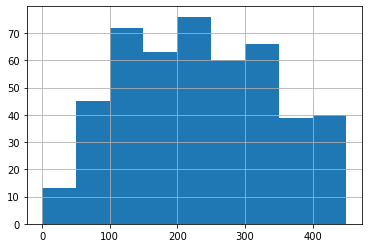

In [ ]:
# distribution of the text data
lens = df.CommercialText.str.len()
lens.hist(bins = np.arange(0,500,50))

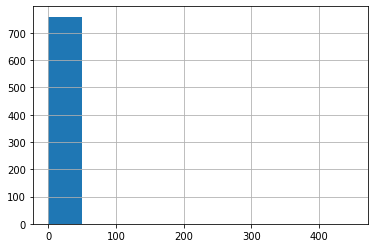

In [ ]:
# distribution of the text data
lens = df.Brand.str.len()
lens.hist(bins = np.arange(0,500,50))

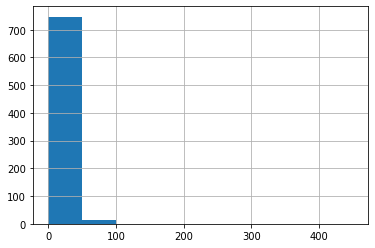

In [ ]:
# distribution of the text data
lens = df.AdName.str.len()
lens.hist(bins = np.arange(0,500,50))

Dropping two columns below

In [ ]:
df = df.drop(['Brand','AdName'],axis = 1)

In [ ]:
# object datatype variables
df.loc[:, df.dtypes == object]

,CommercialText
0,mercedes-benz stellaben sign der neue vie sie ...
1,"49:32 wii. wii 48.18 46?? 50.1 46.39 50,4 reso..."
2,"in über 60 länder. sarargs.com naargecom o, o2..."
3,www.botan.de www.postane www.posthark.com post...
4,ml 22 ich liebe es
...,...
755,ariel 14 cariel do you pod? 3in1 pods ariel yo...
756,ale con adidas ozwalfego adidas as adidas ozwe...
757,?? 22 always do your research. we do. @bayut.c...
758,t) order at que una milionit ruhiwala ?????? i...


In Feature engineering, created Hashing Vector of Commercial text Column

In [ ]:
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(df.CommercialText)
df.CommercialText = vector.toarray()

BreakthroughScore Statistical Summary:

count   7.60e+02
mean    5.46e+01
std     3.24e+01
min     0.00e+00
25%     2.50e+01
50%     5.62e+01
75%     8.44e+01
max     1.00e+02
Name: BreakthroughScore, dtype: float64
Median BreakthroughScore: 56.25
Skewness: -0.23353315668397964


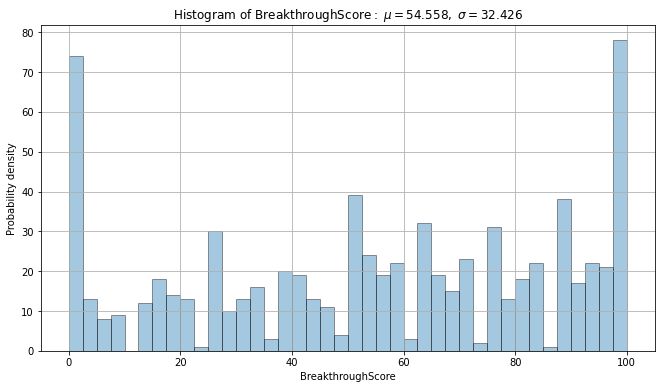

In [ ]:
# Statistical Summary of the target variable
print("BreakthroughScore Statistical Summary:\n")
print(df['BreakthroughScore'].describe())
print("Median BreakthroughScore:", df['BreakthroughScore'].median(axis = 0))
print('Skewness:',df['BreakthroughScore'].skew())
skew = df['BreakthroughScore'].skew()

# mean distribution
mu = df['BreakthroughScore'].mean()

# std distribution
sigma = df['BreakthroughScore'].std()
num_bins = 40

# Histogram of BreakthroughScore
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(df['BreakthroughScore'], num_bins, edgecolor = 'black', lw = 1, alpha = .40)

plt.xlabel('BreakthroughScore')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ BreakthroughScore:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)

#fig.tight_layout()
plt.show()

ResponseScore Statistical Summary:

count   7.60e+02
mean    6.05e+01
std     2.85e+01
min     0.00e+00
25%     3.44e+01
50%     6.88e+01
75%     8.44e+01
max     1.00e+02
Name: ResponseScore, dtype: float64
Median ResponseScore: 68.75
Skewness: -0.5627626523915011


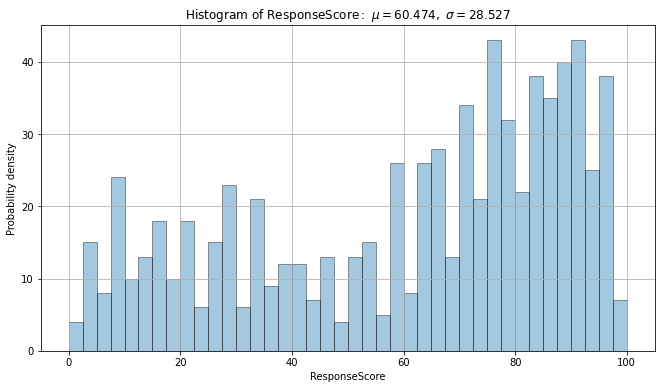

In [ ]:
# Statistical Summary of the target variable
print("ResponseScore Statistical Summary:\n")
print(df['ResponseScore'].describe())
print("Median ResponseScore:", df['ResponseScore'].median(axis = 0))
print('Skewness:',df['ResponseScore'].skew())
skew = df['ResponseScore'].skew()

# mean distribution
mu = df['ResponseScore'].mean()

# std distribution
sigma = df['ResponseScore'].std()
num_bins = 40

# Histogram of ResponseScore
plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(df['ResponseScore'], num_bins, edgecolor = 'black', lw = 1, alpha = .40)

plt.xlabel('ResponseScore')
plt.ylabel('Probability density')

plt.title(r'$\mathrm{Histogram\ of\ ResponseScore:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)

#fig.tight_layout()
plt.show()

Since, we are going to take BreakthroughScore as a target variable. We are going to drop ResponseScore.

In [ ]:
df = df.drop(['ResponseScore'],axis = 1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


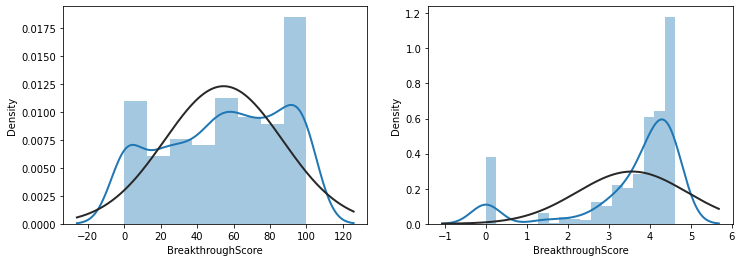

In [ ]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(df['BreakthroughScore'], ax=ax[0], fit=norm)
sns.distplot(np.log(df[('BreakthroughScore')]+1), ax=ax[1], fit= norm)

In [ ]:
def addlogs(res, cols):
    """ Log transform feature list"""
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[c])).values)   
        res.columns.values[m] = c + '_log'
        m += 1
    return res



loglist = ['BreakthroughScore']
df = addlogs(df, loglist)

In [ ]:
# object datatype variables
df.loc[:, df.dtypes == object]

""
0
1
2
3
4
...
755
756
757
758


In [ ]:
df.head()

,Platform,Region,Market,B2CB2B,Category,ProductService,BreakthroughScore,Audio,MusicUsed,HowisMusicUsed_na,HowisMusicUsed_prominent,HowisMusicUsed_background,MusicType_custom,MusicType_na,MusicType_popular,MusicDuration,JingleAudioMnemonic,Doesvideofeaturespeech,SpeechDuration,Numberofwordsspoken,TypeofDialogue_charactertalkingt,TypeofDialogue_intercharacterdia,TypeofDialogue_narrator_voiceove,BrandRevealedAt,BrandRevealedinfirst3secs,...,TimeMessagePresent,X_MessagePresent,Slogan,HowMessageDelivered_visual,HowMessageDelivered_both,HowMessageDelivered_audio,Emotion_functional,Emotion_both,Emotion_emotional,Emotion_na,Videomakesensewithoutsound,Animation,VignetteFormat,Humor,SliceofLife,Ingredients,NumberofScenes,Avg_secondsperscene,VideoEnd_Package,VideoEnd_ScenefromAd,VideoEnd_Logo,SpecialOccation,Holidays,TotalAdDuration,BreakthroughScore_log
0,2,7,5,2,0,18,9.38e+01,1,1,0,0,1,1,0,0,9.90e-01,0,1,4.20e-01,22,0,1,1,2.47e+01,0,...,3.00e+00,1.00e+01,0,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,18,1.66e+00,0,0,0,1,0,2.99e+01,4.55e+00
1,2,7,5,2,6,18,9.69e+01,1,1,0,0,1,1,0,0,9.30e-01,0,1,8.30e-01,3,0,1,1,1.00e+00,1,...,3.00e+00,1.37e+01,0,0,1,0,0,0,1,0,0,0.00e+00,0,1,0,0,17,1.29e+00,0,0,0,0,0,2.19e+01,4.58e+00
2,2,7,5,2,22,21,7.19e+01,1,1,0,0,1,0,0,1,9.90e-01,1,1,5.20e-01,27,0,0,1,2.57e+01,0,...,6.00e+00,2.02e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,25,1.19e+00,0,0,0,0,0,2.98e+01,4.29e+00
3,2,7,5,2,8,18,1.00e+02,1,1,0,0,1,1,0,0,1.00e+00,0,1,6.40e-01,5,0,1,1,3.00e+00,0,...,7.00e+00,3.52e+01,1,0,1,0,0,0,1,0,0,0.00e+00,0,0,1,0,11,1.81e+00,0,0,0,0,0,1.99e+01,4.62e+00
4,2,7,5,2,0,18,7.19e+01,1,1,0,0,1,1,0,0,8.80e-01,1,1,5.90e-01,7,0,0,1,0.00e+00,0,...,2.30e+01,9.16e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,1,1,9,2.79e+00,0,0,0,0,0,2.51e+01,4.29e+00


We have to predict BreakthroughScore so I am creating X without BreakthorughScore and y = BreakthorughScore. Later I want to split my training data using train test split

In [ ]:
X = df.drop(['BreakthroughScore', 'BreakthroughScore_log'],axis = 1)
y = df.BreakthroughScore

Option 1

Here, we will use best features into Random Forest Regressor

In [ ]:
# f_regression: Used only for numeric targets and based on linear regression performance.
# f_classif: Used only for categorical targets, based on Analysis of Variance (ANOVA) statistical test.
# chi2: Performs the chi-square statistic for categorical targets, which is less sensible to the nonlinear relationship between the predictive variable and its target.

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
# In choosing the percentile cutoff, I took a Pareto 80/20 approach and selected the top 20% best, associated features.
# However, I will review the F-score and p-values to confirm that 20% is an appropriate percentile 
# to exclude a feature from participating in the learning process.
support = np.asarray(selector_f.get_support())

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(X.columns.values)
features_with_support = features[support]

# f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)

# top20.index.name = 'Feature'
print('Top 20% best associated features to BreakthroughScore\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))

Top 20% best associated features to BreakthroughScore
Number of features: 30
                              F-score  p-value
PofAdBrandClearlyVisible     4.75e+01 1.17e-11
NumberofScenes               4.50e+01 3.93e-11
Gender_s_ofpeople_both       4.35e+01 7.93e-11
BrandRevealedAt              2.99e+01 6.14e-08
PofAdBrandPresent            2.97e+01 6.71e-08
Emotion_functional           2.90e+01 9.60e-08
X_MessagePresent             2.68e+01 2.83e-07
BrandRevealedinfirst3secs    2.67e+01 3.02e-07
TotalAdDuration              2.44e+01 9.87e-07
Supers                       2.30e+01 2.00e-06
TimeMessagePresent           2.28e+01 2.19e-06
X_ofpeoplefeaturedinad       2.08e+01 5.94e-06
MessageIntroduced            1.76e+01 3.03e-05
ProductService               1.68e+01 4.59e-05
VignetteFormat               1.63e+01 6.02e-05
SliceofLife                  1.62e+01 6.29e-05
SubtitlesorSupers            1.58e+01 7.69e-05
Brandpresentfor50PP          1.54e+01 9.66e-05
CorporateAd                  1

In [ ]:
# Correlations to BreakthroughScore
corr = df.select_dtypes(include = ['float64', 'int64','uint8']).iloc[:, 1:].corr()
cor_dict = corr['BreakthroughScore'].to_dict()
del cor_dict['BreakthroughScore']

print("List the numerical features in decending order by their correlation with BreakthroughScore:\n")

for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
   print ("{0}: \t{1}".format(*ele))

List the numerical features in decending order by their correlation with BreakthroughScore:

PofAdBrandClearlyVisible: 	0.24279605134567503
Gender_s_ofpeople_both: 	-0.23297976682333157
BrandRevealedAt: 	-0.19484994579487216
PofAdBrandPresent: 	0.19428713405781034
BrandRevealedinfirst3secs: 	0.18451442440408605
Supers: 	0.17142930704749645
X_ofpeoplefeaturedinad: 	-0.16343076906043658
ProductService: 	-0.14726697780768205
SubtitlesorSupers: 	0.1429172836715069
Brandpresentfor50PP: 	0.14095326086670698
CorporateAd: 	-0.13563157869804862
CelebrityReason_music: 	-0.1330354295146682
LogoinCorner: 	0.13093909791545288
Numberofwordsspoken: 	-0.12646301068406682
TimeofHumanIntroduction: 	-0.12219523833563593
Childrenshowninad: 	-0.1188067914114598
Gender_s_ofpeople_femaleonly: 	0.11665072716173067
LogoPlacementsMiddleLeft: 	0.11318998712589619
Animaltype: 	-0.11232537659357446
BrandCueType_uniquecreativestyle: 	-0.11029365788437942
Childrenage_gradeschool: 	-0.10816827583809675
Animals: 	-0.1

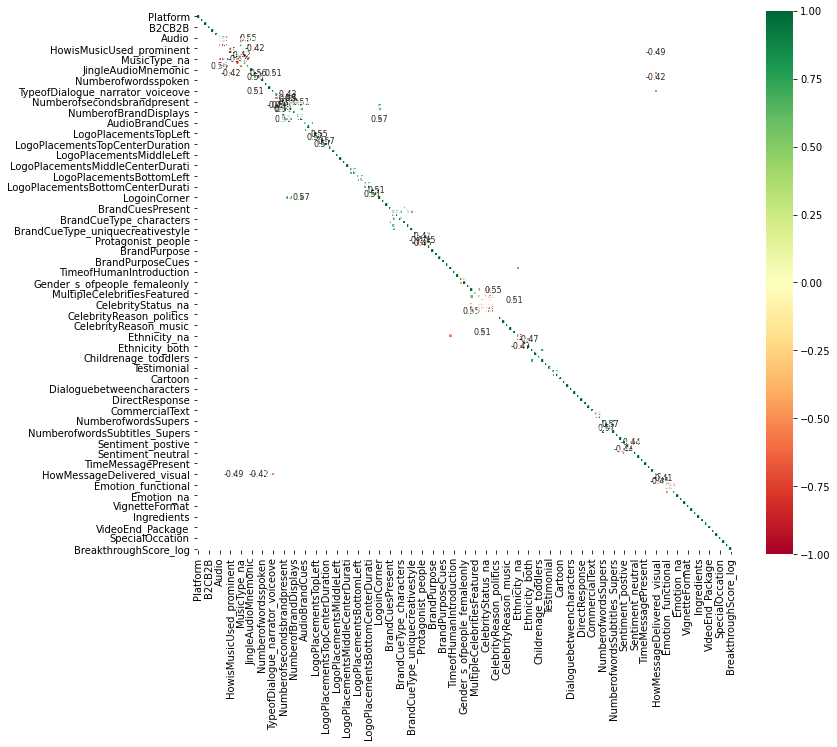

In [ ]:
# Feature-to-Feature Correlation
corr = df.drop('BreakthroughScore', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='RdYlGn', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

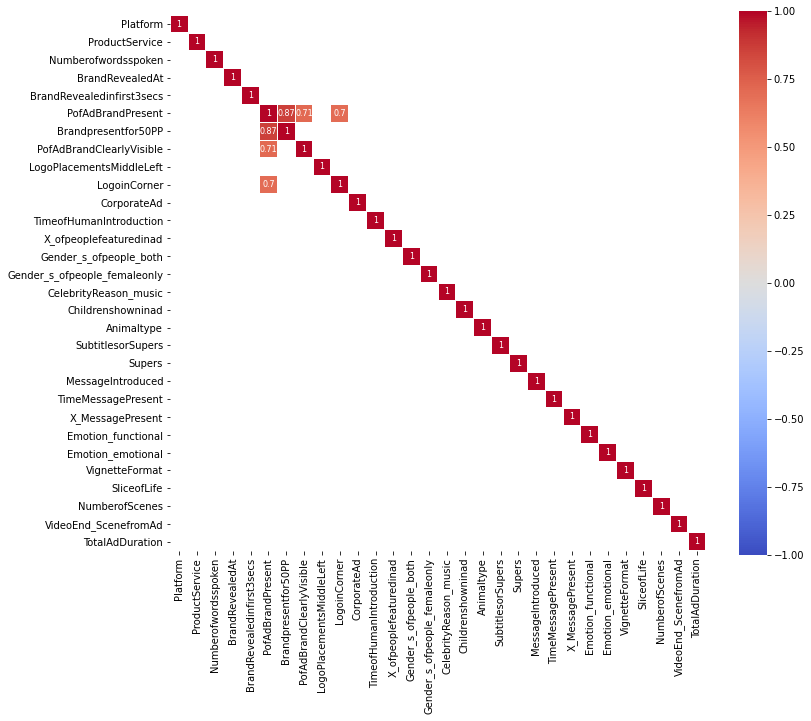

In [ ]:
best_feat = df[features_with_support]
corr =best_feat.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
# most correlated features to BreakthroughScore have been identified. I will feed these features into a Random Forest Regressor
# Random Forest Regression with Best Features
# Split
# Create matrix of best x features
X_best = best_feat

# Create array of target variable
y = y

# Split training data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_best,y, test_size = .20,random_state = 101)

# Fit
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 
rforest.fit(X_train,y_train)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
print('Random Forest Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))

Random Forest Regression Performance
MAE 22.772426754385958
MSE 762.7141064743124
RMSE 27.617279128732296
R^2 = 0.34627614086227954


Plotting correlation map for X

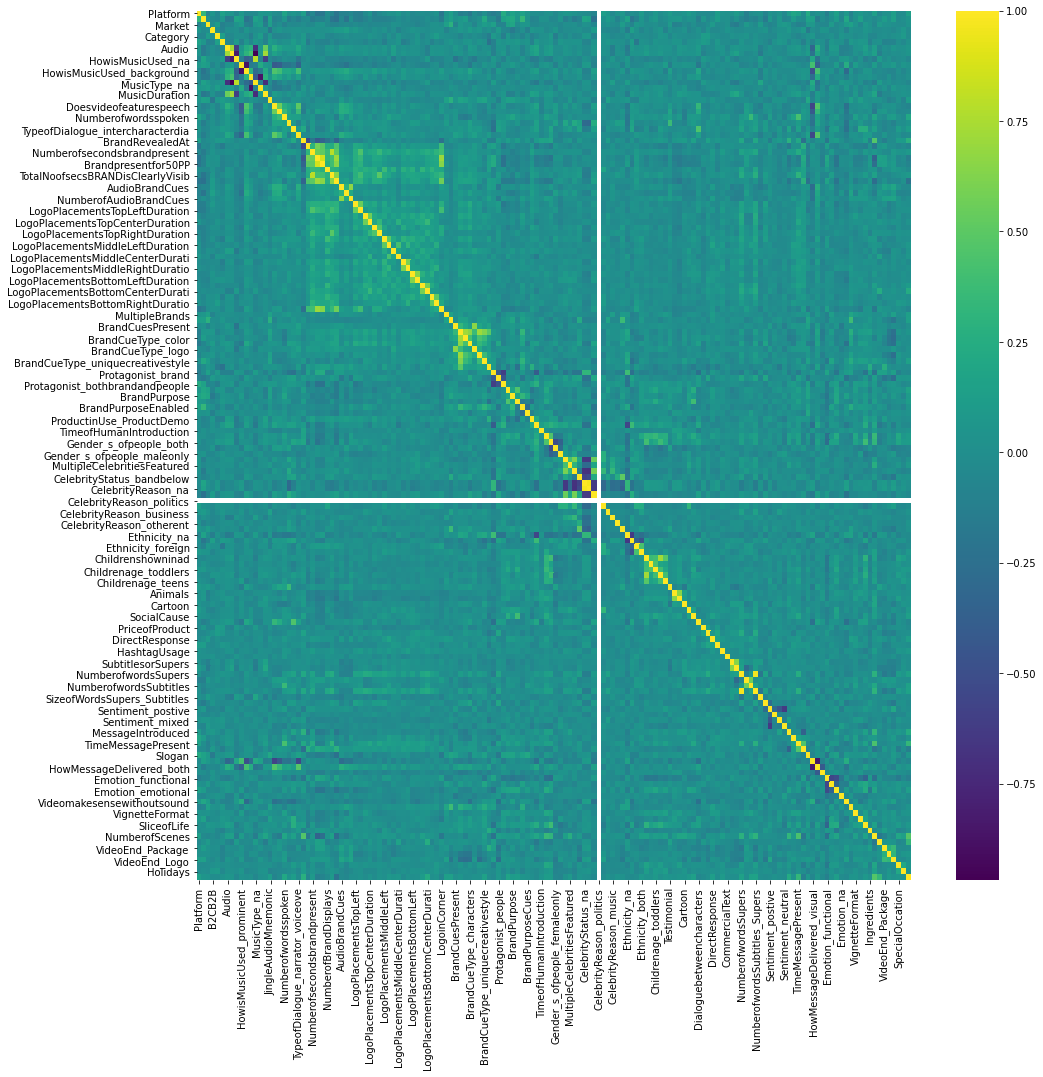

In [ ]:
# correlation in between variables
corr = X.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, cmap='viridis')

Too Confusing, I will find correlation in between variables using first finding important variables using LightGBM and then will delete if the value is more than 0.95

In [ ]:
X.head()

,Platform,Region,Market,B2CB2B,Category,ProductService,Audio,MusicUsed,HowisMusicUsed_na,HowisMusicUsed_prominent,HowisMusicUsed_background,MusicType_custom,MusicType_na,MusicType_popular,MusicDuration,JingleAudioMnemonic,Doesvideofeaturespeech,SpeechDuration,Numberofwordsspoken,TypeofDialogue_charactertalkingt,TypeofDialogue_intercharacterdia,TypeofDialogue_narrator_voiceove,BrandRevealedAt,BrandRevealedinfirst3secs,Numberofsecondsbrandpresent,...,NumberofMessages,TimeMessagePresent,X_MessagePresent,Slogan,HowMessageDelivered_visual,HowMessageDelivered_both,HowMessageDelivered_audio,Emotion_functional,Emotion_both,Emotion_emotional,Emotion_na,Videomakesensewithoutsound,Animation,VignetteFormat,Humor,SliceofLife,Ingredients,NumberofScenes,Avg_secondsperscene,VideoEnd_Package,VideoEnd_ScenefromAd,VideoEnd_Logo,SpecialOccation,Holidays,TotalAdDuration
0,2,7,5,2,0,18,1,1,0,0,1,1,0,0,9.90e-01,0,1,4.20e-01,22,0,1,1,2.47e+01,0,4.00e+00,...,1,3.00e+00,1.00e+01,0,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,18,1.66e+00,0,0,0,1,0,2.99e+01
1,2,7,5,2,6,18,1,1,0,0,1,1,0,0,9.30e-01,0,1,8.30e-01,3,0,1,1,1.00e+00,1,5.00e+00,...,1,3.00e+00,1.37e+01,0,0,1,0,0,0,1,0,0,0.00e+00,0,1,0,0,17,1.29e+00,0,0,0,0,0,2.19e+01
2,2,7,5,2,22,21,1,1,0,0,1,0,0,1,9.90e-01,1,1,5.20e-01,27,0,0,1,2.57e+01,0,4.10e+00,...,1,6.00e+00,2.02e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,25,1.19e+00,0,0,0,0,0,2.98e+01
3,2,7,5,2,8,18,1,1,0,0,1,1,0,0,1.00e+00,0,1,6.40e-01,5,0,1,1,3.00e+00,0,8.40e+00,...,1,7.00e+00,3.52e+01,1,0,1,0,0,0,1,0,0,0.00e+00,0,0,1,0,11,1.81e+00,0,0,0,0,0,1.99e+01
4,2,7,5,2,0,18,1,1,0,0,1,1,0,0,8.80e-01,1,1,5.90e-01,7,0,0,1,0.00e+00,0,0.00e+00,...,1,2.30e+01,9.16e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,1,1,9,2.79e+00,0,0,0,0,0,2.51e+01


In [ ]:
print("Data types and their frequency\n{}".format(X.dtypes.value_counts()))

Data types and their frequency
int64      124
float64     26
dtype: int64


Split the data set into training and testing data with a fixed random value.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Option 2

LightGBM used for training the model.

The LightGBM hyper parameter settings are below. The settings below are best on a few iterations of training.

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [ ]:
gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='RMSE',
        early_stopping_rounds=1000)

[1]	valid_0's auc: 0.684075	valid_0's rmse: 31.3557	valid_0's l2: 983.183
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's auc: 0.698582	valid_0's rmse: 31.302	valid_0's l2: 979.816
[3]	valid_0's auc: 0.679239	valid_0's rmse: 31.2581	valid_0's l2: 977.069
[4]	valid_0's auc: 0.666022	valid_0's rmse: 31.2176	valid_0's l2: 974.54
[5]	valid_0's auc: 0.673114	valid_0's rmse: 31.1802	valid_0's l2: 972.207
[6]	valid_0's auc: 0.671825	valid_0's rmse: 31.1498	valid_0's l2: 970.309
[7]	valid_0's auc: 0.668601	valid_0's rmse: 31.1056	valid_0's l2: 967.56
[8]	valid_0's auc: 0.670535	valid_0's rmse: 31.0596	valid_0's l2: 964.699
[9]	valid_0's auc: 0.678917	valid_0's rmse: 31.0252	valid_0's l2: 962.562
[10]	valid_0's auc: 0.670535	valid_0's rmse: 30.9842	valid_0's l2: 960.018
[11]	valid_0's auc: 0.680851	valid_0's rmse: 30.9412	valid_0's l2: 957.357
[12]	valid_0's auc: 0.68472	valid_0's rmse: 30.8991	valid_0's l2: 954.756
[13]	valid_0's auc: 0.685364	valid_0's rmse: 30.8

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[39]	valid_0's auc: 0.713088	valid_0's rmse: 29.9347	valid_0's l2: 896.086
[40]	valid_0's auc: 0.712444	valid_0's rmse: 29.9038	valid_0's l2: 894.235
[41]	valid_0's auc: 0.714378	valid_0's rmse: 29.8666	valid_0's l2: 892.017
[42]	valid_0's auc: 0.713088	valid_0's rmse: 29.8326	valid_0's l2: 889.985
[43]	valid_0's auc: 0.718891	valid_0's rmse: 29.7898	valid_0's l2: 887.433
[44]	valid_0's auc: 0.723404	valid_0's rmse: 29.7475	valid_0's l2: 884.914
[45]	valid_0's auc: 0.725983	valid_0's rmse: 29.7124	valid_0's l2: 882.828
[46]	valid_0's auc: 0.730496	valid_0's rmse: 29.6786	valid_0's l2: 880.818
[47]	valid_0's auc: 0.73501	valid_0's rmse: 29.6374	valid_0's l2: 878.374
[48]	valid_0's auc: 0.737589	valid_0's rmse: 29.6059	valid_0's l2: 876.507
[49]	valid_0's auc: 0.73372	valid_0's rmse: 29.5761	valid_0's l2: 874.748
[50]	valid_0's auc: 0.732431	valid_0's rmse: 29.5533	valid_0's l2: 873.395
[51]	valid_0's auc: 0.73501	valid_0's rmse: 29.5165	valid_0's l2: 871.224
[52]	valid_0's auc: 0.740168

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

print('MAE',metrics.mean_absolute_error(y_pred, y_test))
print('MSE',metrics.mean_squared_error(y_pred, y_test))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R^2 =',metrics.explained_variance_score(y_pred, y_test))

MAE 16.668339496232498
MSE 436.03139431997874
RMSE 20.88136476191101
R^2 = -0.019904215525760716


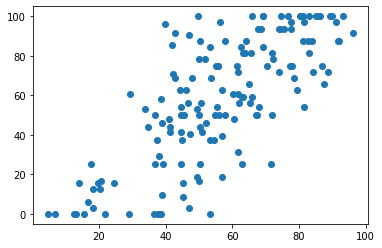

In [ ]:
plt.scatter(y_pred, y_test)

Option 3

Train model using Random Regressor

In [ ]:
# Random forest regressor
rf = RandomForestRegressor(n_estimators=500,min_samples_split=15)

rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=1e-07, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

print('MAE',metrics.mean_absolute_error(y_test, predicted_test))
print('MSE',metrics.mean_squared_error(y_test, predicted_test))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))
print('R^2 =',metrics.explained_variance_score(y_test, predicted_test))

MAE 18.70987780010998
MSE 544.5740250310444
RMSE 23.336109894989875
R^2 = 0.4444325783601162


In [ ]:
# important Variables
predicted_test = rf.predict(X_test)

fI = pd.DataFrame()
fI['Variable'] = list(X_train.columns)
fI['Importance'] = rf.feature_importances_
fI.sort_values(by='Importance',ascending=False)[0:15]

,Variable,Importance
149,TotalAdDuration,1.92e-01
0,Platform,1.02e-01
2,Market,6.69e-02
1,Region,5.52e-02
29,PofAdBrandClearlyVisible,3.55e-02
118,SizeofWordsSupers_Subtitles,2.84e-02
143,Avg_secondsperscene,1.94e-02
4,Category,1.85e-02
42,LogoPlacementsMiddleCenterDurati,1.83e-02
18,Numberofwordsspoken,1.71e-02


In [ ]:
# top variables 
topVars= list(fI.sort_values(by='Importance',ascending=False)[0:15]['Variable'])
topVars

['TotalAdDuration',
 'Platform',
 'Market',
 'Region',
 'PofAdBrandClearlyVisible',
 'SizeofWordsSupers_Subtitles',
 'Avg_secondsperscene',
 'Category',
 'LogoPlacementsMiddleCenterDurati',
 'Numberofwordsspoken',
 'X_MessagePresent',
 'SpeechDuration',
 'BrandRevealedAt',
 'PofAdBrandPresent',
 'MessageIntroduced']

Option 4

1st round training using LightGBM: find out important features -> delete correlated features.

Run the model for extracting important features

In [ ]:
train = X
test = y

In [ ]:
# set default parameters for 1st round training
params = {'boosting': 'gbdt',
          'objective':'regression',
          'metric': 'rmse',
          'learning_rate': 0.01, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large, but over-fitting
          'max_bin': 66,  #60 #50 # large,but slower,over-fitting
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.5,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1 #0.1
         }

In [ ]:
BreakthroughScore = df['BreakthroughScore']

In [ ]:
# Kfold cross-validation
# folds = KFold(n_splits=5, shuffle=True, random_state=11)

from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

nfolds = 5
nrepeats = 2 
folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(train))
feature_importance_df = pd.DataFrame()
lgb_preds = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values,BreakthroughScore.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=BreakthroughScore.iloc[trn_idx]) #categorical_feature=categorical_feats
    val_data = lgb.Dataset(train.iloc[val_idx], label=BreakthroughScore.iloc[val_idx]) #categorical_feature=categorical_feats

    iteration = 2000
    lgb_m = lgb.train(params, trn_data, iteration, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    fold_pred[val_idx] = lgb_m.predict(train.iloc[val_idx], num_iteration=lgb_m.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.columns
    fold_importance_df["importance"] = lgb_m.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    lgb_preds += lgb_m.predict(test, num_iteration=lgb_m.best_iteration) / (nfolds*nrepeats)

print("CV score: {:<8.5f}".format(np.sqrt(mean_squared_error(fold_pred, BreakthroughScore))))

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 25.6799	valid_1's rmse: 28.6792
[200]	training's rmse: 21.8425	valid_1's rmse: 26.7376
[300]	training's rmse: 19.3028	valid_1's rmse: 25.5588
[400]	training's rmse: 17.3756	valid_1's rmse: 24.9861
[500]	training's rmse: 15.8603	valid_1's rmse: 24.4865
[600]	training's rmse: 14.5815	valid_1's rmse: 24.3415
[700]	training's rmse: 13.4892	valid_1's rmse: 24.3519
Early stopping, best iteration is:
[645]	training's rmse: 14.079	valid_1's rmse: 24.2766


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 25.5509	valid_1's rmse: 27.8676
[200]	training's rmse: 21.9259	valid_1's rmse: 25.0616
[300]	training's rmse: 19.4164	valid_1's rmse: 23.6453
[400]	training's rmse: 17.7305	valid_1's rmse: 22.9986
[500]	training's rmse: 16.2812	valid_1's rmse: 22.4625
[600]	training's rmse: 14.9924	valid_1's rmse: 22.1396
[700]	training's rmse: 13.8839	valid_1's rmse: 21.8534
[800]	training's rmse: 12.9006	valid_1's rmse: 21.7879
[900]	training's rmse: 12.0098	valid_1's rmse: 21.6938
[1000]	training's rmse: 11.2359	valid_1's rmse: 21.6106
[1100]	training's rmse: 10.4913	valid_1's rmse: 21.5224
[1200]	training's rmse: 9.84385	valid_1's rmse: 21.4287
Early stopping, best iteration is:
[1158]	training's rmse: 10.0917	valid_1's rmse: 21.4239
fold n°2
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 25.6558	valid_1's rmse: 27.3204
[200]	training's rmse: 21.6948	valid_1's rmse: 

In [ ]:
# ranking all feature by avg importance score from Kfold, select top50
all_features = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
all_features.reset_index(inplace=True)
important_features = list(all_features[0:50]['feature'])
all_features[0:50]

,feature,importance
0,Market,6.24e+02
1,Region,3.72e+02
2,TotalAdDuration,3.43e+02
3,Avg_secondsperscene,3.34e+02
4,SpeechDuration,3.06e+02
5,SizeofWordsSupers_Subtitles,3.02e+02
6,X_MessagePresent,2.80e+02
7,LogoPlacementsMiddleCenterDurati,2.79e+02
8,PofAdBrandClearlyVisible,2.72e+02
9,NumberofwordsSubtitles_Supers,2.61e+02


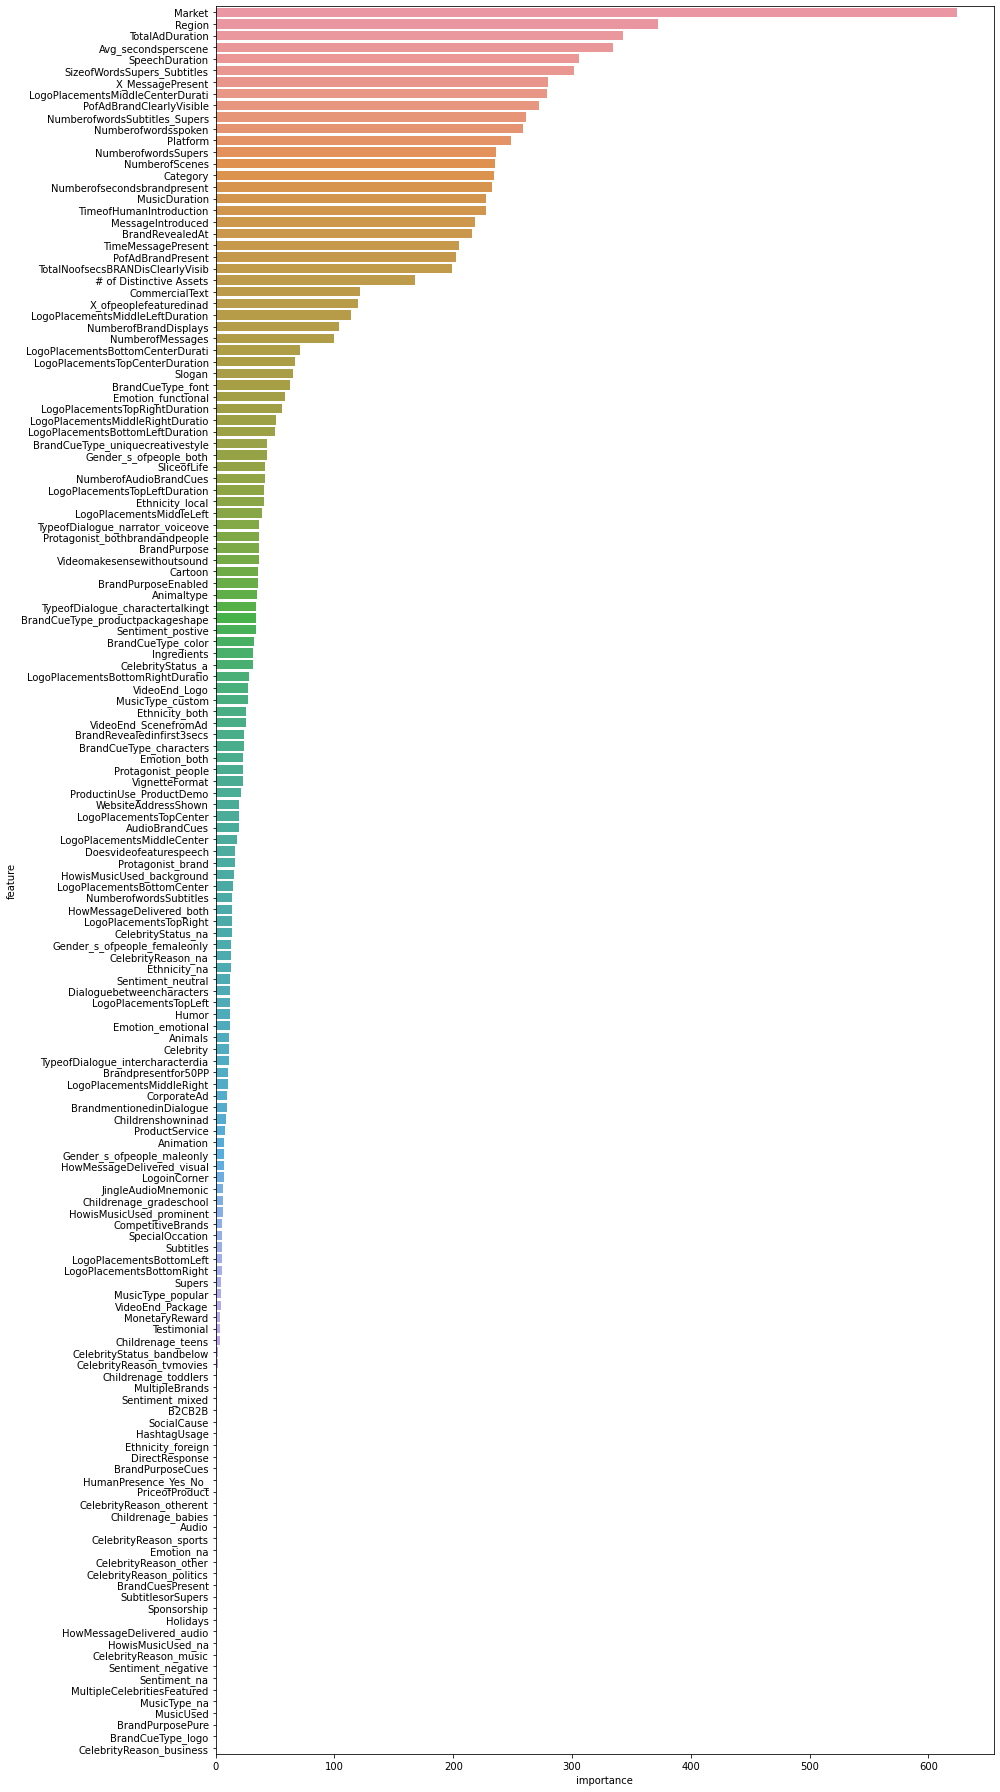

In [ ]:
# plot important features
plt.figure(figsize=(14,25))
sns.barplot(x="importance",y="feature",data=all_features)
plt.tight_layout()

In [ ]:
# Check feature correlation 
# important_features = list(final_importance['feature'][0:60])
df = train[important_features]
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(high_cor))
print(high_cor)

1
['NumberofwordsSupers']


In [ ]:
# final selected features: drop highly correlated features from important features.
features = [i for i in important_features if i not in high_cor]
print(len(features))
print(features)

49
['Market', 'Region', 'TotalAdDuration', 'Avg_secondsperscene', 'SpeechDuration', 'SizeofWordsSupers_Subtitles', 'X_MessagePresent', 'LogoPlacementsMiddleCenterDurati', 'PofAdBrandClearlyVisible', 'NumberofwordsSubtitles_Supers', 'Numberofwordsspoken', 'Platform', 'NumberofScenes', 'Category', 'Numberofsecondsbrandpresent', 'MusicDuration', 'TimeofHumanIntroduction', 'MessageIntroduced', 'BrandRevealedAt', 'TimeMessagePresent', 'PofAdBrandPresent', 'TotalNoofsecsBRANDisClearlyVisib', '# of Distinctive Assets', 'CommercialText', 'X_ofpeoplefeaturedinad', 'LogoPlacementsMiddleLeftDuration', 'NumberofBrandDisplays', 'NumberofMessages', 'LogoPlacementsBottomCenterDurati', 'LogoPlacementsTopCenterDuration', 'Slogan', 'BrandCueType_font', 'Emotion_functional', 'LogoPlacementsTopRightDuration', 'LogoPlacementsMiddleRightDuratio', 'LogoPlacementsBottomLeftDuration', 'BrandCueType_uniquecreativestyle', 'Gender_s_ofpeople_both', 'SliceofLife', 'NumberofAudioBrandCues', 'LogoPlacementsTopLeftDu

2nd round training LightGBM: final prediction only with selected features and Train model with selected important_features only

1st round: run the model for extracting important features

In [ ]:
# params for 2nd round training
params = {'boosting': 'gbdt',
          'objective':'regression',
          'metric': 'rmse',
          'learning_rate': 0.003, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large, but over-fitting
          'max_bin': 66,  #60 #50 # large,but slower,over-fitting
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.8,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1 #0.1
         }

In [ ]:
train = train[features]
test = test

In [ ]:
# Use Kfold predict
nfolds = 5
nrepeats = 2 

folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(train))
lgb_preds = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, BreakthroughScore.values)): #target.values
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=BreakthroughScore.iloc[trn_idx]) #categorical_feature=categorical_feats
    val_data = lgb.Dataset(train.iloc[val_idx], label=BreakthroughScore.iloc[val_idx]) #categorical_feature=categorical_feats

    iteration = 3000
    lgb_model = lgb.train(params, trn_data, iteration, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    fold_pred[val_idx] = lgb_model.predict(train.iloc[val_idx], num_iteration=lgb_model.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.columns
    fold_importance_df["importance"] = lgb_model.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    lgb_preds += lgb_model.predict(test, num_iteration=lgb_model.best_iteration) / (nfolds*nrepeats)

print("CV score: {:<8.5f}".format(np.sqrt(mean_squared_error(fold_pred, BreakthroughScore))))

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 29.5345	valid_1's rmse: 30.6385
[200]	training's rmse: 27.3536	valid_1's rmse: 29.3438
[300]	training's rmse: 25.5499	valid_1's rmse: 28.1838
[400]	training's rmse: 24.0597	valid_1's rmse: 27.2142
[500]	training's rmse: 22.6304	valid_1's rmse: 26.0461
[600]	training's rmse: 21.5916	valid_1's rmse: 25.5151
[700]	training's rmse: 20.7394	valid_1's rmse: 25.2464
[800]	training's rmse: 19.9645	valid_1's rmse: 25.1558
[900]	training's rmse: 19.2281	valid_1's rmse: 24.7971
[1000]	training's rmse: 18.5047	valid_1's rmse: 24.3275
[1100]	training's rmse: 17.9275	valid_1's rmse: 24.2915
Early stopping, best iteration is:
[1069]	training's rmse: 18.1064	valid_1's rmse: 24.2795


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 29.4258	valid_1's rmse: 31.4606
[200]	training's rmse: 27.4907	valid_1's rmse: 29.6462
[300]	training's rmse: 25.897	valid_1's rmse: 28.1522
[400]	training's rmse: 24.3591	valid_1's rmse: 26.747
[500]	training's rmse: 23.1868	valid_1's rmse: 25.7587
[600]	training's rmse: 22.1424	valid_1's rmse: 24.9507
[700]	training's rmse: 21.373	valid_1's rmse: 24.5392
[800]	training's rmse: 20.567	valid_1's rmse: 23.9733
[900]	training's rmse: 19.8424	valid_1's rmse: 23.5661
[1000]	training's rmse: 19.156	valid_1's rmse: 23.1804
[1100]	training's rmse: 18.5068	valid_1's rmse: 22.9302
[1200]	training's rmse: 17.953	valid_1's rmse: 22.6957
[1300]	training's rmse: 17.4027	valid_1's rmse: 22.3673
[1400]	training's rmse: 16.9372	valid_1's rmse: 22.2103
[1500]	training's rmse: 16.4862	valid_1's rmse: 22.1941
[1600]	training's rmse: 16.0293	valid_1's rmse: 22.1056
[1700]	training's rmse: 15.6407	valid_1's rmse:

In [ ]:
# feature importance
final_importance = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
final_importance.reset_index(inplace=True)
final_importance[0:20]

,feature,importance
0,Market,1.75e+03
1,Region,1.17e+03
2,TotalAdDuration,9.45e+02
3,NumberofwordsSubtitles_Supers,7.71e+02
4,Platform,7.35e+02
5,SpeechDuration,7.05e+02
6,SizeofWordsSupers_Subtitles,6.62e+02
7,LogoPlacementsMiddleCenterDurati,6.61e+02
8,Avg_secondsperscene,6.58e+02
9,PofAdBrandClearlyVisible,6.28e+02


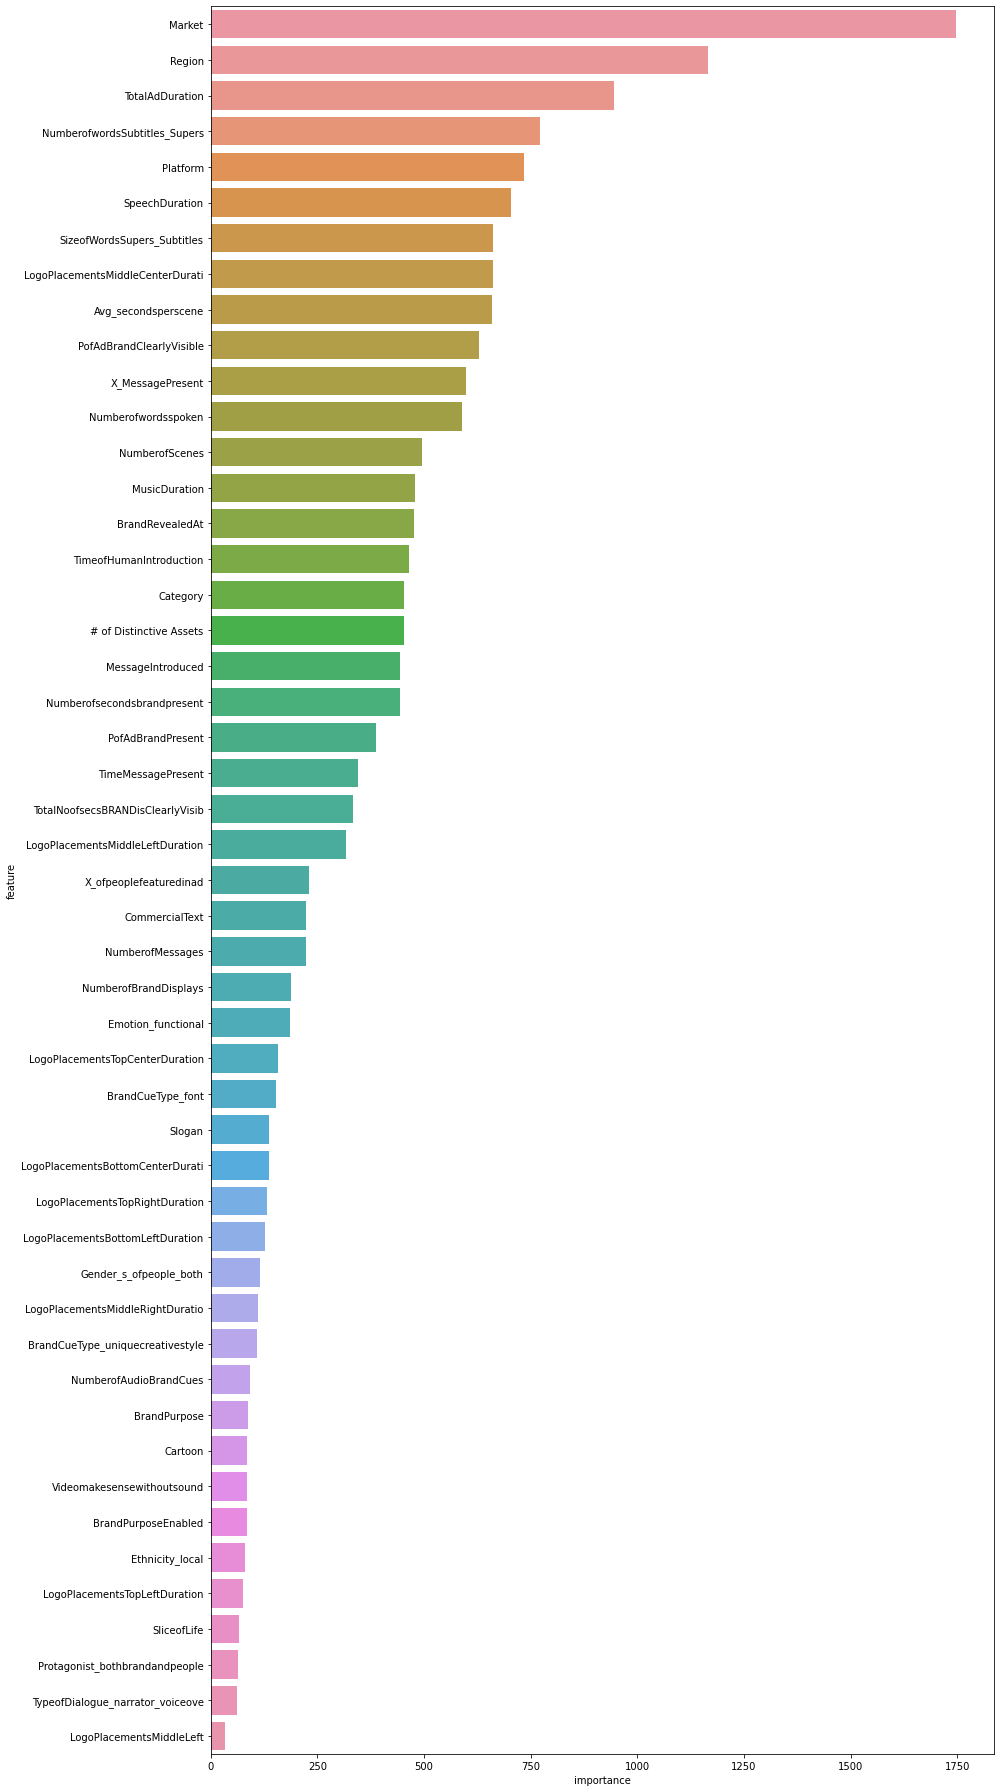

In [ ]:
# plot important features
plt.figure(figsize=(14,25))
sns.barplot(x="importance",y="feature",data=final_importance)
plt.tight_layout()

LightGBM provides a robust implementation of gradient boosting for decision trees. The training times are comparably short and out of the box and with minimal tuning you can achieve excellent model accuracy. 

To take these model to the next level of performance, other areas to try would be:

Different transformations to normalise the skewed data (eg Box 
Cox transform).

Stacking or ensembling of multiple models together. Other possible models could be the SKlearn XGBOOST or something completely different like an ANN.

Hyperparameter tuning should be applied. Currently only a few parameters have been tried. The parameter space is large for LightGBM with numerous possibilities. 

With a few tweaks and some additional time on feature enrichment, then significant advances in accuracy could be achieved.

In [ ]:
!pip install nbconvert

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [ ]:
# Install the latest version of TensorFlow
!pip install -q -U tensorflow==1.7.0

In [ ]:
import itertools
import os
import math
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
layers = keras.layers

# This code was tested with TensorFlow v1.7
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.7.0


In [ ]:
data.head()

,AdNumber,ID,Brand,AdName,Platform,Region,Market,B2CB2B,Category,ProductService,BreakthroughScore,ResponseScore,Audio,MusicUsed,HowisMusicUsed_na,HowisMusicUsed_prominent,HowisMusicUsed_background,MusicGenreUsed,MusicType_custom,MusicType_na,MusicType_popular,MusicDuration,JingleAudioMnemonic,Doesvideofeaturespeech,SpeechDuration,...,X_MessagePresent,Slogan,HowMessageDelivered_visual,HowMessageDelivered_both,HowMessageDelivered_audio,Emotion_functional,Emotion_both,Emotion_emotional,Emotion_na,Videomakesensewithoutsound,Animation,VignetteFormat,Humor,SliceofLife,Ingredients,ProminentColor,NumberofScenes,Avg_secondsperscene,VideoEnd_Package,VideoEnd_ScenefromAd,VideoEnd_Logo,SpecialOccation,Holidays,TotalAdDuration,NumberFrames
0,1,2950,Mercedes,AI_Mercedes_2950,Non-mobile,Western Europe,Germany,B2C,Automotive,Product,9.38e+01,2.19e+01,1,1,0,0,1,NaN,1,0,0,9.90e-01,0,1,4.20e-01,...,1.00e+01,0,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,NaN,18,1.66e+00,0,0,0,1,0,2.99e+01,299
1,2,2954,Nintendo wii,AI_Nintendo WII_2954,Non-mobile,Western Europe,Germany,B2C,Entertainment,Product,9.69e+01,4.53e+01,1,1,0,0,1,NaN,1,0,0,9.30e-01,0,1,8.30e-01,...,1.37e+01,0,0,1,0,0,0,1,0,0,0.00e+00,0,1,0,0,NaN,17,1.29e+00,0,0,0,0,0,2.19e+01,221
2,3,2955,O2,AI_O2_2955,Non-mobile,Western Europe,Germany,B2C,Telecommunications,Service,7.19e+01,9.38e+00,1,1,0,0,1,"Alternative, Indie Rock, Electro, Techno/House...",0,0,1,9.90e-01,1,1,5.20e-01,...,2.02e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,0,0,NaN,25,1.19e+00,0,0,0,0,0,2.98e+01,299
3,4,2979,Postbank,AI_Postbank_2979,Non-mobile,Western Europe,Germany,B2C,Financial_Services,Product,1.00e+02,1.25e+01,1,1,0,0,1,NaN,1,0,0,1.00e+00,0,1,6.40e-01,...,3.52e+01,1,0,1,0,0,0,1,0,0,0.00e+00,0,0,1,0,NaN,11,1.81e+00,0,0,0,0,0,1.99e+01,200
4,5,2982,Renault,AI_Mc Donalds_2982,Non-mobile,Western Europe,Germany,B2C,Automotive,Product,7.19e+01,3.75e+01,1,1,0,0,1,NaN,1,0,0,8.80e-01,1,1,5.90e-01,...,9.16e+01,1,0,1,0,0,1,0,0,0,0.00e+00,0,1,1,1,NaN,9,2.79e+00,0,0,0,0,0,2.51e+01,252


In [ ]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 608
Test size: 152


In [ ]:
# Train features
description_train = data['CommercialText'][:train_size]
variety_train = data['B2CB2B'][:train_size]

# Train labels
labels_train = data['BreakthroughScore'][:train_size]

# Test features
description_test = data['CommercialText'][train_size:]
variety_test = data['B2CB2B'][train_size:]

# Test labels
labels_test = data['BreakthroughScore'][train_size:]

In [ ]:
# Create a tokenizer to preprocess our text descriptions
vocab_size = 20000
tokenize = keras.preprocessing.text.Tokenizer(num_words=vocab_size, char_level=False)
tokenize.fit_on_texts(description_train) # only fit on train

In [ ]:
# Wide feature 1: sparse bag of words (bow) vocab_size vector 
description_bow_train = tokenize.texts_to_matrix(description_train)
description_bow_test = tokenize.texts_to_matrix(description_test)

In [ ]:
# Wide feature 2: one-hot vector of variety categories

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(variety_train)
variety_train = encoder.transform(variety_train)
variety_test = encoder.transform(variety_test)
num_classes = np.max(variety_train) + 1

# Convert labels to one hot
variety_train = keras.utils.to_categorical(variety_train, num_classes)
variety_test = keras.utils.to_categorical(variety_test, num_classes)

In [ ]:
# Define our wide model with the functional API
bow_inputs = layers.Input(shape=(vocab_size,))
variety_inputs = layers.Input(shape=(num_classes,))
merged_layer = layers.concatenate([bow_inputs, variety_inputs])
merged_layer = layers.Dense(256, activation='relu')(merged_layer)
predictions = layers.Dense(1)(merged_layer)
wide_model = keras.Model(inputs=[bow_inputs, variety_inputs], outputs=predictions)

In [ ]:
wide_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(wide_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 20000)        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 20003)        0           input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 256)          5121024     concatenate_3[0][0]              
__________

In [ ]:
# Deep model feature: word embeddings 
train_embed = tokenize.texts_to_sequences(description_train)
test_embed = tokenize.texts_to_sequences(description_test)

max_seq_length = 300
train_embed = keras.preprocessing.sequence.pad_sequences(
    train_embed, maxlen=max_seq_length, padding="post")
test_embed = keras.preprocessing.sequence.pad_sequences(
    test_embed, maxlen=max_seq_length, padding="post")

In [ ]:
# Define our deep model with the Functional API
deep_inputs = layers.Input(shape=(max_seq_length,))
embedding = layers.Embedding(vocab_size, 8, input_length=max_seq_length)(deep_inputs)
embedding = layers.Flatten()(embedding)
embed_out = layers.Dense(1)(embedding)
deep_model = keras.Model(inputs=deep_inputs, outputs=embed_out)
print(deep_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 300, 8)            160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2401      
Total params: 162,401
Trainable params: 162,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
deep_model.compile(loss='mse',
                       optimizer='adam',
                       metrics=['accuracy'])

In [ ]:
# Combine wide and deep into one model
merged_out = layers.concatenate([wide_model.output, deep_model.output])
merged_out = layers.Dense(1)(merged_out)
combined_model = keras.Model(wide_model.input + [deep_model.input], merged_out)
print(combined_model.summary())

combined_model.compile(loss='mse',
                       optimizer='adam',
                       metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 20000)        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 20003)        0           input_4[0][0]                    
                                                                 input_5[0][0]                    
__________

In [ ]:
# Run training
combined_model.fit([description_bow_train, variety_train] + [train_embed], labels_train, epochs=100, batch_size=128)

Epoch 1/100
608/608 [==============================] - 2s 3ms/step - loss: 3421.1144 - acc: 0.0049
Epoch 2/100
608/608 [==============================] - 1s 2ms/step - loss: 2906.2710 - acc: 0.0000e+00
Epoch 3/100
608/608 [==============================] - 1s 2ms/step - loss: 2438.8756 - acc: 0.0000e+00
Epoch 4/100
608/608 [==============================] - 1s 2ms/step - loss: 2033.1611 - acc: 0.0000e+00
Epoch 5/100
608/608 [==============================] - 1s 2ms/step - loss: 1706.7894 - acc: 0.0000e+00
Epoch 6/100
608/608 [==============================] - 1s 2ms/step - loss: 1449.7408 - acc: 0.0000e+00
Epoch 7/100
608/608 [==============================] - 1s 2ms/step - loss: 1260.0062 - acc: 0.0000e+00
Epoch 8/100
608/608 [==============================] - 1s 2ms/step - loss: 1130.1695 - acc: 0.0000e+00
Epoch 9/100
608/608 [==============================] - 1s 2ms/step - loss: 1050.1445 - acc: 0.0000e+00
Epoch 10/100
608/608 [==============================] - 1s 2ms/step - loss: 1

In [ ]:
combined_model.evaluate([description_bow_test, variety_test] + [test_embed], labels_test, batch_size=128)

152/152 [==============================] - 0s 878us/step


[1004.4428518194901, 0.0]

In [ ]:
# Generate predictions
predictions = combined_model.predict([description_bow_test, variety_test] + [test_embed])

In [ ]:
# Compare predictions with actual values for the first few items in our test dataset
num_predictions = 40
diff = 0

for i in range(num_predictions):
    val = predictions[i]
    print(description_test.iloc[i])
    print('Predicted: ', val[0], 'Actual: ', labels_test.iloc[i], '\n')
    diff += abs(val[0] - labels_test.iloc[i])

l'oréal paris 6: giay l'or new colo rista #color yourway paris coi ris seiri-perika rista colo rista semi-permanent color l'oréal paris colo rista semi-permanent color ris colo rista seiri-perika paris rista colo semi-permanent color colo rista l'oréal rista hair col semi-permanent color l'oréal hair colorist/paris colo rista hair colorist/paris rista colo kista kista colo rista rista colo rista rista kind to your hair to 10 shampoos ver ?? 11 shades sechs le hair coloris new paris juc
Predicted:  57.096985 Actual:  90.63 

it on ??? ????? ?? ???? og loreal on #painton infaillible eye paint l'oréal makeup designer paris loreal loreal l'oréal eye paint makeup designer paris on makel loreal lorea god l'oréal makeup designer/ loreal lore makeup designer/ lobal iton lore iton lobal you ion v90 ion lobal loreal lonta. makeup designer paris vi lonta. lor (o) mom l'oréal wowa ?? slide to paint on a lor bored with dullness? on lobal
Predicted:  48.36019 Actual:  75.0 

l'oréal ally actual l'or

In [ ]:
# Compare the average difference between actual price and the model's predicted price
print('Average prediction difference: ', diff / num_predictions)

Average prediction difference:  29.832666766703124


In [ ]:
!jupyter nbconvert --to html "/content/Machine_Learning_Test.ipynb"

[NbConvertApp] WARNING | pattern u'/content/Machine_Learning_Test.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
